In [5]:
import torch as t
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = t.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = t.utils.data.DataLoader(test, batch_size=10, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
X = t.rand((28, 28))
X = X.view(-1, 28*28)

In [0]:
output = net(X)

In [8]:
output

tensor([[-2.1686, -2.2727, -2.1859, -2.3178, -2.3801, -2.2950, -2.3283, -2.3134,
         -2.3495, -2.4459]], grad_fn=<LogSoftmaxBackward>)

In [10]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001 )

EPOCHS = 3 

for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data #X contains grayscale pixel values. y contains label values.
    net.zero_grad() # set the gradient to zero before calculation loss on every step.
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y) # Our data is not one-hot-encoding type, so beacuse of that we can not use MSE for calculating loss. We have a scalar value so loss function will be calculating with nll_loss() function. 
    loss.backward() # Feed the loss value to neural network backward.
    optimizer.step() # This is a parameter update basen on the current gradient.
  print(loss)

tensor(1.0686, grad_fn=<NllLossBackward>)
tensor(0.0347, grad_fn=<NllLossBackward>)
tensor(0.0022, grad_fn=<NllLossBackward>)


In [16]:
correct = 0
total = 0

with t.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if t.argmax(i) == y[idx]:
        correct += 1
      total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.978


In [20]:
y[1]

tensor(0)

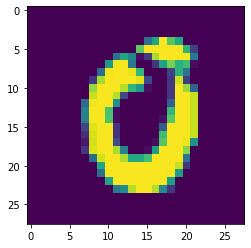

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28, 28)) # First image pixels 
plt.show() # Equal to y[0] (in other words our first label)

In [30]:
print(torch.argmax(net(X[1].view(-1,784))[0])) # Argmax func finding the class with the largest predicted probability.
y[1]

tensor(0)


tensor(0)